In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants, interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, savgol_filter
import plotly.express as px
from scipy.optimize import curve_fit

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data2_300K = pd.read_csv('GaN_2_300K.csv')
data2_250K = pd.read_csv('GaN_2_250K.csv')
data2_200K = pd.read_csv('GaN_2_200K.csv')
data2_150K = pd.read_csv('GaN_2_150K.csv')
data2_100K = pd.read_csv('GaN_2_100K.csv')
data2_50K = pd.read_csv('GaN_2_50K.csv')
data2_100K_h = pd.read_csv('GaN_2_100K_h.csv')
data2_200K_h = pd.read_csv('GaN_2_200K_h.csv')

In [3]:
data1_300K = pd.read_csv('GaN_1_300K.csv')
data1_250K = pd.read_csv('GaN_1_250K.csv')
data1_200K = pd.read_csv('GaN_1_200K.csv')
data1_150K = pd.read_csv('GaN_1_150K.csv')
data1_100K = pd.read_csv('GaN_1_100K.csv')
data1_50K = pd.read_csv('GaN_1_50K.csv')

In [4]:
VAC_2 = pd.read_csv('GaN_2_VAC.csv')
VAC_2 = VAC_2.replace(',', '.', regex=True)

VAC_1 = pd.read_csv('GaN_1_VAC.csv')
VAC_1 = VAC_1.replace(',', '.', regex=True)

In [5]:
VAC_2['Bias, V'] = pd.to_numeric(VAC_2['Bias, V'])
VAC_2.Current_300K = pd.to_numeric(VAC_2.Current_300K).abs()
VAC_2.Current_250K_1 = pd.to_numeric(VAC_2.Current_250K_1).abs()
VAC_2.Current_250K_2 = pd.to_numeric(VAC_2.Current_250K_2).abs()
VAC_2.Current_200K_1 = pd.to_numeric(VAC_2.Current_200K_1).abs()
VAC_2.Current_200K_2 = pd.to_numeric(VAC_2.Current_200K_2).abs()
VAC_2.Current_150K_1 = pd.to_numeric(VAC_2.Current_150K_1).abs()
VAC_2.Current_150K_2 = pd.to_numeric(VAC_2.Current_150K_2).abs()
VAC_2.Current_100K = pd.to_numeric(VAC_2.Current_100K).abs()
VAC_2.Current_50K = pd.to_numeric(VAC_2.Current_50K).abs()
VAC_2.Current_100K_h = pd.to_numeric(VAC_2.Current_100K_h).abs()
VAC_2.Current_200K_h = pd.to_numeric(VAC_2.Current_200K_h).abs()

In [6]:
VAC_1['Bias, V'] = pd.to_numeric(VAC_1['Bias, V'])
VAC_1.Current_300K = pd.to_numeric(VAC_1.Current_300K).abs()
VAC_1.Current_250K = pd.to_numeric(VAC_1.Current_250K).abs()
VAC_1.Current_200K = pd.to_numeric(VAC_1.Current_200K).abs()
VAC_1.Current_150K = pd.to_numeric(VAC_1.Current_150K).abs()
VAC_1.Current_100K = pd.to_numeric(VAC_1.Current_100K).abs()
VAC_1.Current_50K = pd.to_numeric(VAC_1.Current_50K).abs()

In [7]:
VAC_2 = VAC_2.rename(columns={'Current_250K_2':'Current_250K', 'Current_200K_1':'Current_200K','Current_150K_1':'Current_150K' })


In [8]:
VAC_2.head()

,"Bias, V",Current_300K,Current_250K_1,Current_250K,Current_200K,Current_200K_2,Current_150K,Current_150K_2,Current_100K,Current_50K,Current_100K_h,Current_200K_h
0,-3.00,4.610000e-07,3.020000e-08,2.980000e-08,9.380000e-09,1.240000e-08,6.170000e-09,2.370000e-09,4.000000e-11,1.100000e-11,1.340000e-10,9.430000e-09
1,-2.95,4.200000e-07,4.770000e-08,2.840000e-08,9.150000e-09,1.020000e-08,4.470000e-09,2.000000e-09,1.800000e-11,4.000000e-12,1.300000e-11,8.540000e-09
2,-2.90,4.040000e-07,1.280000e-08,2.720000e-08,8.950000e-09,8.140000e-09,4.070000e-09,1.290000e-09,6.000000e-11,1.100000e-11,9.000000e-12,4.440000e-09
3,-2.85,3.770000e-07,1.320000e-08,2.850000e-08,7.480000e-09,8.660000e-09,3.710000e-09,1.170000e-09,3.200000e-11,2.200000e-11,4.200000e-11,3.900000e-09
4,-2.80,3.630000e-07,1.440000e-08,2.480000e-08,7.050000e-09,6.450000e-09,3.170000e-09,1.000000e-09,1.500000e-11,2.000000e-12,3.600000e-11,4.290000e-09


In [11]:
eps = 9.7
S = constants.pi/4*(0.15)**2

In [12]:
data2_300K.head()

,Bias,Capacity_1K,Conductivity_1K,Capacity_10K,Conductivity_10K,Capacity_100K,Conductivity_100K,Capacity_1M,Conductivity_1M
0,-3.000,8.561618e-10,0.000605,8.730995e-11,0.000609,1.693394e-11,0.000607,1.165965e-11,0.000622
1,-2.985,1.383910e-09,0.000586,8.320448e-11,0.000603,1.676762e-11,0.000603,1.162560e-11,0.000614
2,-2.970,5.712257e-10,0.000589,3.671002e-11,0.000601,1.492807e-11,0.000603,1.163421e-11,0.000612
3,-2.955,-1.661104e-09,0.000587,1.300496e-10,0.000600,1.609213e-11,0.000601,1.154479e-11,0.000611
4,-2.940,6.530316e-11,0.000599,7.928940e-11,0.000607,1.530347e-11,0.000603,1.155096e-11,0.000612


In [15]:
data1_50K.head()

,Bias,Capacity_1K,Conductivity_1K,Capacity_100K,Conductivity_100K,Capacity_1M,Conductivity_1M
0,-3.000,4.816977e-10,1.911778e-07,4.997109e-10,0.000004,5.303149e-10,0.000219
1,-2.982,4.809922e-10,-1.409301e-08,5.023978e-10,0.000004,5.336523e-10,0.000223
2,-2.965,5.108989e-10,-1.691216e-07,5.046651e-10,0.000004,5.364754e-10,0.000223
3,-2.947,5.479240e-10,-1.160303e-07,5.063349e-10,0.000004,5.386271e-10,0.000226
4,-2.930,5.117393e-10,9.898526e-08,5.069424e-10,0.000004,5.397267e-10,0.000228


In [16]:
# data2_300K['1_over_C2_1M'] = 1/data2_300K['Capacity_1M']**2
data2_250K['1_over_C2_100k'] = 1/data2_250K['Capacity_100K']**2
data2_200K['1_over_C2_100k'] = 1/data2_200K['Capacity_100K']**2
data2_150K['1_over_C2_100k'] = 1/data2_150K['Capacity_100K']**2
data2_100K['1_over_C2_100k'] = 1/data2_100K['Capacity_100K']**2
data2_50K['1_over_C2_100k'] = 1/data2_50K['Capacity_100K']**2
data2_300K['1_over_C2_100k'] = 1/data2_300K['Capacity_100K']**2

In [17]:
data1_300K['1_over_C2_100k'] = 1/data1_300K['Capacity_100K']**2
data1_150K['1_over_C2_100k'] = 1/data1_150K['Capacity_100K']**2
data1_50K['1_over_C2_100k'] = 1/data1_50K['Capacity_100K']**2

In [18]:
def graph_100k(data):
#     dat = data2_250K.loc[(data2_250K['Bias']>-0.5)]
    coefficients = 0
    poly = 0
    
    plt.figure(figsize(9,5))
    fig1, ax = plt.subplots()
    fig1 = plt.scatter(x=data['Bias'], y=data['1_over_C2_100k'])

    ax.grid(True, linestyle='-.')

    coefficients = np.polyfit(data['Bias'], y=data['1_over_C2_100k'], deg=1)
    poly = np.poly1d(coefficients)
    lin_fit = poly(data['Bias'])
    plt.plot(data['Bias'], lin_fit, color='red')

    plt.xlabel('Bias')
    plt.ylabel('1/C^2')
    plt.title('')
    plt.show()

In [244]:
def voltamp(x, y, x1, x2, t):
    coefficients = 0
    poly = 0
    
    fig, axs = plt.subplots(figsize=(7, 5))

    axs.xaxis.set_major_locator(MultipleLocator(0.025))

#     plt.yscale('log')

    axs = plt.plot(x.loc[(x>x1)&(x<x2)], np.log(y.loc[(x>x1)&(x<x2)]),linewidth=2.5)

    plt.title('Линейный участок T={} K'.format(t), fontsize='x-large')
    plt.legend(('300K', '250K', '200K',  '150K',  '100K', '50K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')

    coefficients = np.polyfit(x.loc[(x>x1)&(x<x2)], np.log(y.loc[(x>x1)&(x<x2)]), deg=1)
    poly = np.poly1d(coefficients)
    lin_fit = poly(x.loc[(x>x1)&(x<x2)])
    plt.plot(x.loc[(x>x1)&(x<x2)], lin_fit, color='red')

    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.grid() 
    
    print(poly)
    print('I_0 = ', f'{np.exp(poly[0]):.2e}')
    print('rho = ',  poly[1].round(2))
    print('phi_b = ', poly[0]/poly[1])

In [19]:
def change_diap(data, x1, x2):
    data = data.loc[(data['Bias']>x1) & (data['Bias']<x2)]

In [202]:
def Nd(data):
    coefficients = np.polyfit(data['Bias'], y=data['1_over_C2_100k'], deg=1)
    polynom = np.poly1d(coefficients)                                                                                        
    return  abs(2/(constants.e*constants.epsilon_0*S**2*eps*1e-2)/polynom[1])

$N_d = \frac{2}{q \varepsilon \varepsilon_0 S^2} (-\frac{d \frac{1}{C^2}}{d V})^{-1}$

$\varepsilon = 9.7$

$[ \varepsilon_0] = 1 F/m = 0.01 F/cm $

$I = A* T^2 e^\frac{-e\phi_b}{kT}(e^\frac{-eU}{kT} - 1)$

$\rho = \frac{1}{q \mu_n n}$ 

$\mu \approx m^{*-3/2} T^{1/2} $

$m^* = 0.2m_0$

In [20]:
def params(dat, x1 ):
#    x1 - left bias lim
#    x2 - right bias lim
    coefficirnts = 0
    V_d = 0
    N_d = 0
    coefficients = np.polyfit(dat['Bias'].loc[(dat['Bias']>x1)], y=dat['1_over_C2_100k'].loc[dat['Bias']>x1], deg=1)
    polynom = np.poly1d(coefficients)
    V_d = coefficients[0]/coefficients[1]                                                                                         
    N_d = abs(2/(constants.e*constants.epsilon_0*S**2*eps*1e-2)/polynom[1])
    print(polynom)
    print('V_d = ', V_d.round(2))
    print('N_d =',   f'{N_d:.2e}')

In [306]:
def Vd(data, x1 ):
    coefficients = 0
    V_d = 0
    coefficients = np.polyfit(data['Bias'].loc[(data['Bias']>x1)], y=data['1_over_C2_100k'].loc[data['Bias']>x1], deg=1)
    polynom = np.poly1d(coefficients)
    V_d = coefficients[0]/coefficients[1]                                                                                         
    return V_d.round(2)

In [43]:
def VAC_plot(x1, y1, x2, y2, V, t):
    fig, axs = plt.subplots(figsize=(12,7))

    axs.xaxis.set_major_locator(MultipleLocator(0.25))
    axs = plt.plot(x1.loc[x1>V], y1.loc[x1>V],linewidth=2.5)
    axs = plt.plot(x2.loc[x2>V], y2.loc[x2>V],linewidth=2.5)

    plt.legend(('1 контакт', '2 контакт'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)

    plt.yscale('log')

    plt.title(' Вольт-амперная характеристика. T={} K'.format(t) , fontsize='x-large')
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)


    plt.grid()

In [253]:
def voltamp_comp(x1, y1, x2, y2, a1,  b1, a2, b2, t):
    coefficients1 = 0
    coefficients2 = 0
    poly1 = 0
    poly2 = 0
    
    
    fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.1},figsize=(16,6))

    plt.title('Линейный участок при T={} K'.format(t), fontsize='x-large')
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
#     plt.yscale('log')

    plt.subplot(121)
    plt.title('1 контакт', fontsize='x-large')
    plt.plot(x1.loc[(x1>a1)&(x1<b1)], np.log(y1.loc[(x1>a1)&(x1<b1)]),linewidth=2.5)
    coefficients1 = np.polyfit(x1.loc[(x1>a1)&(x1<b1)], np.log(y1.loc[(x1>a1)&(x1<b1)]), deg=1)
    poly1 = np.poly1d(coefficients1)
    lin_fit1 = poly1(x1.loc[(x1>a1)&(x1<b1)])
    plt.plot(x1.loc[(x1>a1)&(x1<b1)], lin_fit1, color='red')
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    plt.grid()
   
    
    
    plt.subplot(122)
    plt.title('2 контакт', fontsize='x-large')
    plt.plot(x2.loc[(x2>a2)&(x2<b2)], np.log(y2.loc[(x2>a2)&(x2<b2)]),linewidth=2.5)
    coefficients2 = np.polyfit(x2.loc[(x2>a2)&(x2<b2)], np.log(y2.loc[(x2>a2)&(x2<b2)]), deg=1)
    poly2 = np.poly1d(coefficients2)
    lin_fit2 = poly2(x2.loc[(x2>a2)&(x2<b2)])
    plt.plot(x2.loc[(x2>a2)&(x2<b2)], lin_fit2, color='red')
    
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    plt.grid()

   
    print(poly)
    print('I_0 = ', f'{np.exp(poly1[0]):.2e}')
    print('R = ',  poly1[1].round(2))
    print('phi_b = ', (poly1[0]/poly1[1]).round(2))
    
    print('I_0 = ', f'{np.exp(poly2[0]):.2e}')
    print('R = ',  poly2[1].round(2))
    print('phi_b = ', (poly2[0]/poly2[1]).round(2))

In [143]:
def current(x,y,a,b):
    coefficients = np.polyfit(x.loc[(x>a)&(x<b)], np.log(y.loc[(x>a)&(x<b)]), deg=1)
    poly = np.poly1d(coefficients)
    return np.exp(poly[0])

In [257]:
def phi_b(x,y,a,b):
    coefficients = np.polyfit(x.loc[(x>a)&(x<b)], np.log(y.loc[(x>a)&(x<b)]), deg=1)
    poly = np.poly1d(coefficients)
    return (poly[0]/poly[1]).round(2)

In [203]:
N_d2 = []

In [214]:
data2_300K = data2_300K.loc[data2_300K['Bias']>-0.4]

<Figure size 648x360 with 0 Axes>

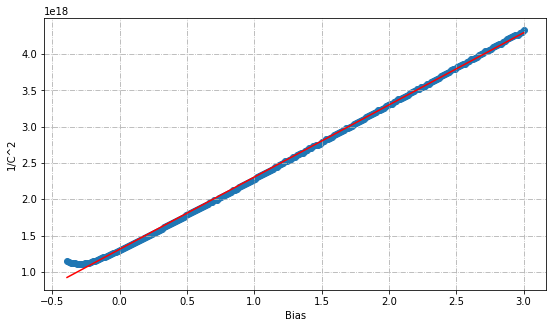

In [215]:
graph_100k(data2_300K)

In [22]:
params(data2_300K, -0.4)

 
9.939e+17 x + 1.311e+18
V_d =  0.76
N_d = 4.68e+16


In [319]:
V_d2=[]

In [320]:
V_d2.append(Vd(data2_300K, -0.4))

In [321]:
data2_250K = data2_250K.loc[(data2_250K['Bias']>-0.5)]

<Figure size 648x360 with 0 Axes>

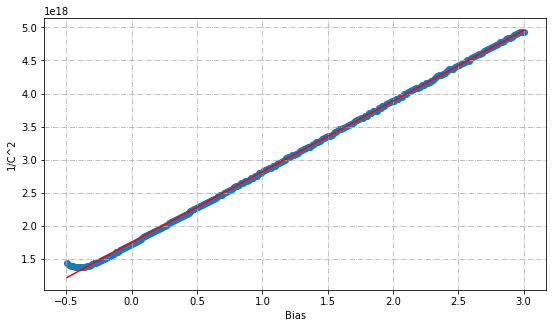

In [322]:
graph_100k(data2_250K)

In [323]:
params(data2_250K, -0.5)
V_d2.append(Vd(data2_250K, -0.5))

 
1.067e+18 x + 1.753e+18
V_d =  0.61
N_d = 4.36e+16


<Figure size 648x360 with 0 Axes>

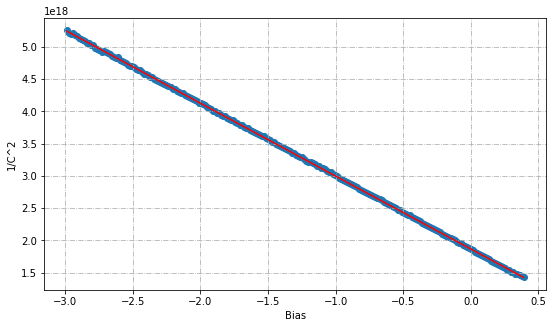

In [324]:
data2_200K = data2_200K.loc[(data2_200K['Bias']>-3)&(data2_200K['Bias']<0.4)]
graph_100k(data2_200K)

In [325]:
params(data2_200K, -3)
V_d2.append(Vd(data2_200K, -3))

 
-1.13e+18 x + 1.868e+18
V_d =  -0.6
N_d = 4.12e+16


<Figure size 648x360 with 0 Axes>

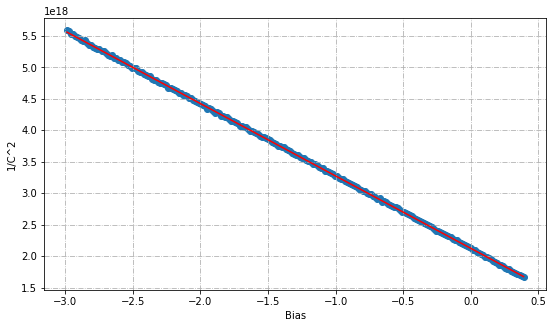

In [326]:
data2_150K = data2_150K.loc[(data2_150K['1_over_C2_100k']<1e21)&(data2_200K['Bias']<1)]
graph_100k(data2_150K)
# &(data2_200K['Bias']<0.4)

In [327]:
params(data2_150K, -3)
V_d2.append(Vd(data2_150K, -3))

 
-1.15e+18 x + 2.125e+18
V_d =  -0.54
N_d = 4.05e+16


<Figure size 648x360 with 0 Axes>

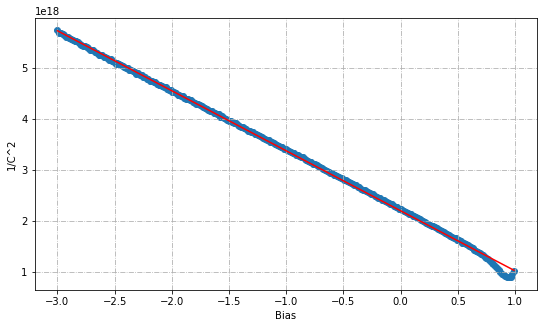

In [328]:
data22_100K = data2_100K.loc[(data2_100K['Bias']<1)]
graph_100k(data22_100K)

In [329]:
params(data22_100K, -3)
V_d2.append(Vd(data22_100K, -3))

 
-1.175e+18 x + 2.199e+18
V_d =  -0.53
N_d = 3.96e+16


<Figure size 648x360 with 0 Axes>

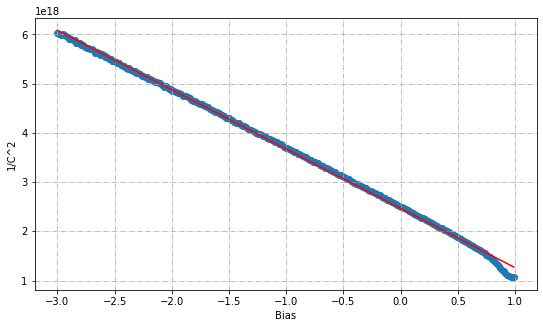

In [330]:
data2_50K = data2_50K.loc[(data2_50K['1_over_C2_100k']<1e19)&(data2_50K['Bias']<1)]
graph_100k(data2_50K)

In [331]:
params(data2_50K, -3)
V_d2.append(Vd(data2_50K, -3))

 
-1.206e+18 x + 2.465e+18
V_d =  -0.49
N_d = 3.86e+16


<Figure size 648x360 with 0 Axes>

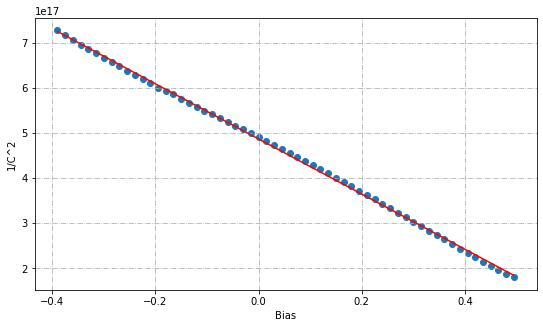

In [332]:
data1_300K = data1_300K.loc[(data1_300K['1_over_C2_100k']<1e19)&(data2_300K['Bias']<0.5)]
graph_100k(data1_300K)

In [333]:
V_d1 = []

In [334]:
params(data1_300K, -3)
V_d1.append(Vd(data1_300K, -3))

 
-6.116e+17 x + 4.871e+17
V_d =  -1.26
N_d = 7.61e+16


<Figure size 648x360 with 0 Axes>

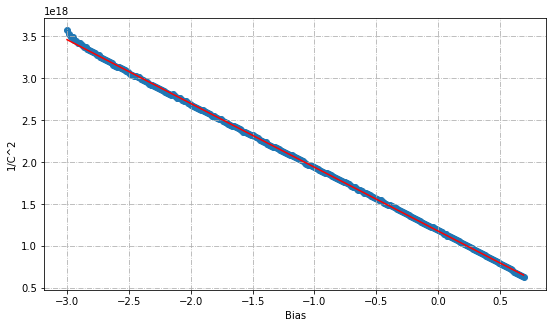

In [335]:
data1_150K = data1_150K.loc[(data1_150K['1_over_C2_100k']<1e19)&(data1_150K['Bias']<0.7)]
graph_100k(data1_150K)

In [336]:
params(data1_150K, -3)
V_d1.append(Vd(data1_150K, -3))

 
-7.593e+17 x + 1.182e+18
V_d =  -0.64
N_d = 6.13e+16


<Figure size 648x360 with 0 Axes>

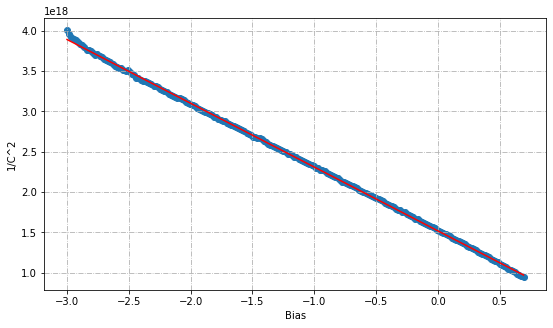

In [337]:
data1_50K = data1_50K.loc[(data1_50K['1_over_C2_100k']<1e19)&(data1_50K['Bias']<0.7)]
graph_100k(data1_50K) 

In [338]:
params(data1_50K, -3)
V_d1.append(Vd(data1_50K, -3))

 
-7.9e+17 x + 1.519e+18
V_d =  -0.52
N_d = 5.89e+16


In [339]:
I_01 = []
I_02 = []
phi1 = []
phi2 = []

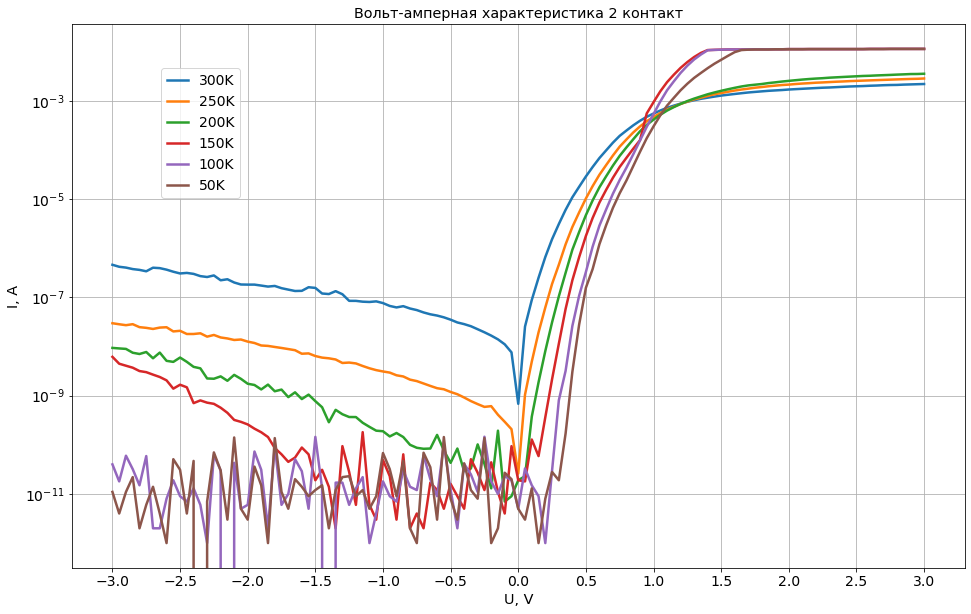

In [340]:
fig, axs = plt.subplots(figsize=(16,10))

axs.xaxis.set_major_locator(MultipleLocator(0.5))

for i in ['300K', '250K', '200K', '150K', '100K', '50K']:
    axs = plt.plot(VAC_2['Bias, V'], VAC_2['Current_{}'.format(i)],linewidth=2.5)


plt.yscale('log')

plt.title('Вольт-амперная характеристика 2 контакт', fontsize='x-large')
plt.legend(('300K', '250K', '200K',  '150K',  '100K', '50K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()

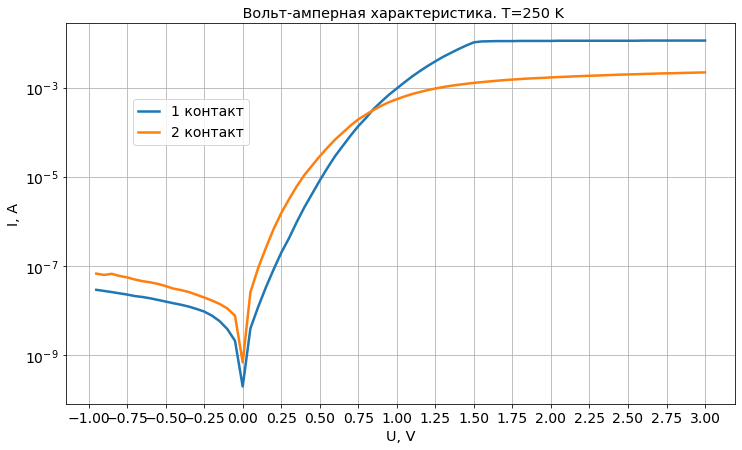

In [341]:
VAC_plot(VAC_1['Bias, V'],VAC_1['Current_300K'], VAC_2['Bias, V'],VAC_2['Current_300K'], -1, 250)

<function poly at 0x0E9CF5C8>
I_0 =  2.70e-09
R =  16.61
phi_b =  -1.19
I_0 =  2.30e-08
R =  15.96
phi_b =  -1.1


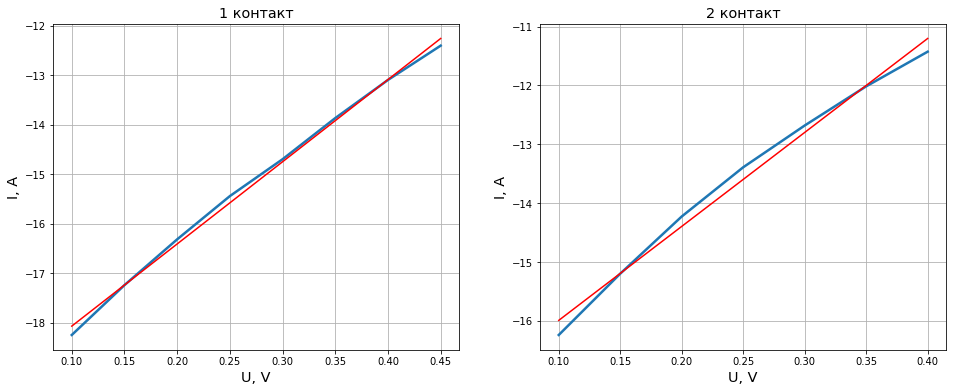

In [342]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_300K'], VAC_2['Bias, V'],VAC_2['Current_300K'], 0.05, 0.5, 0.05, 0.45, 300)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_300K'], 0.05, 0.5))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_300K'], 0.05, 0.45))

phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_300K'], 0.05, 0.5))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_300K'], 0.05, 0.45))

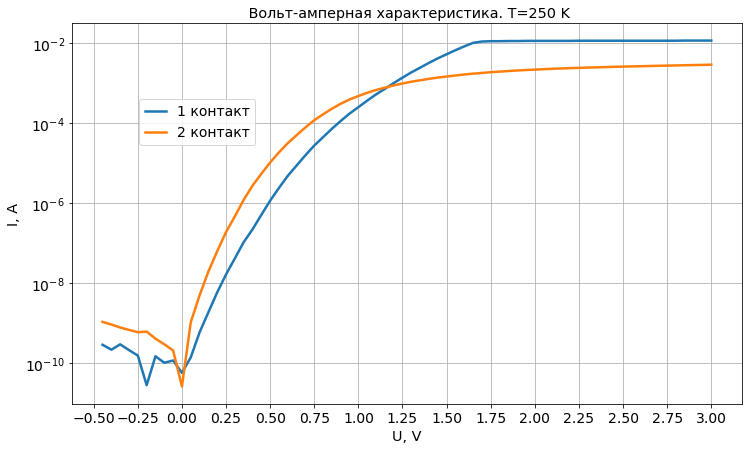

In [343]:
VAC_plot(VAC_1['Bias, V'],VAC_1['Current_250K'], VAC_2['Bias, V'],VAC_2['Current_250K'],-0.5, 250)

<function poly at 0x0E9CF5C8>
I_0 =  1.41e-10
R =  18.51
phi_b =  -1.23
I_0 =  5.90e-10
R =  22.7
phi_b =  -0.94


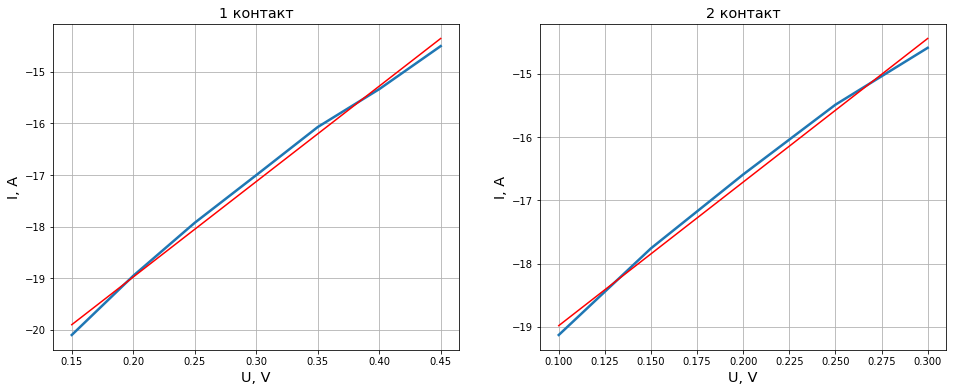

In [344]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_250K'], VAC_2['Bias, V'],VAC_2['Current_250K'], 0.1, 0.5, 0.05, 0.35, 300)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_250K'], 0.1, 0.5))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_250K'], 0.05, 0.35))


phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_250K'], 0.1, 0.5))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_250K'], 0.05, 0.35))


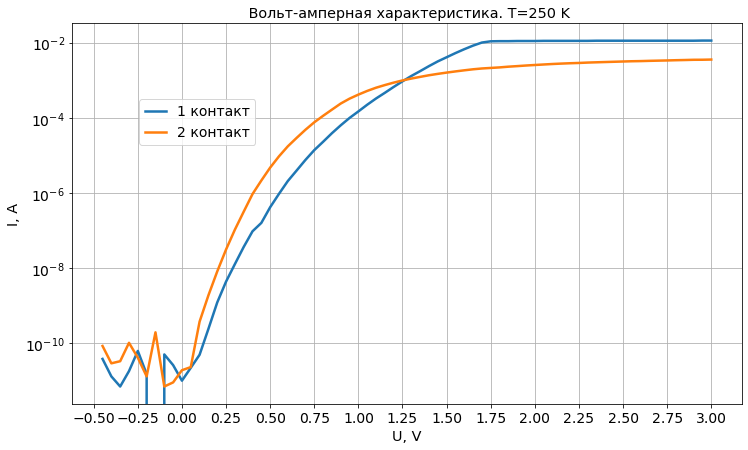

In [345]:
VAC_plot(VAC_1['Bias, V'],VAC_1['Current_200K'], VAC_2['Bias, V'],VAC_2['Current_200K'],-0.5, 250)

<function poly at 0x0E9CF5C8>
I_0 =  2.57e-11
R =  20.61
phi_b =  -1.18
I_0 =  4.92e-11
R =  25.62
phi_b =  -0.93


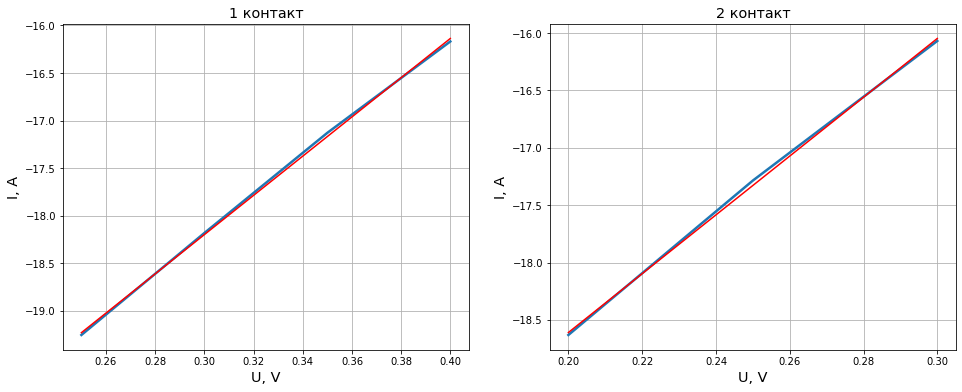

In [346]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_200K'], VAC_2['Bias, V'],VAC_2['Current_200K'], 0.2, 0.45, 0.15, 0.35, 200)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_200K'], 0.2, 0.45))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_200K'], 0.15, 0.35))


phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_200K'], 0.2, 0.45))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_200K'], 0.15, 0.35))

<function poly at 0x0E9CF5C8>
I_0 =  2.07e-12
R =  20.74
phi_b =  -1.3
I_0 =  9.60e-11
R =  19.52
phi_b =  -1.18


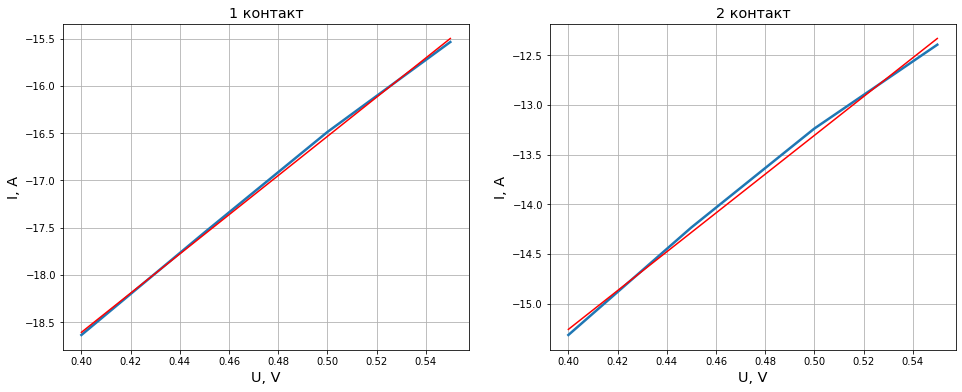

In [347]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_150K'], VAC_2['Bias, V'],VAC_2['Current_150K'], 0.35, 0.6, 0.35, 0.6, 100)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_150K'], 0.35, 0.6))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_150K'], 0.35, 0.6))


phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_150K'], 0.35, 0.6))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_150K'], 0.35, 0.6))


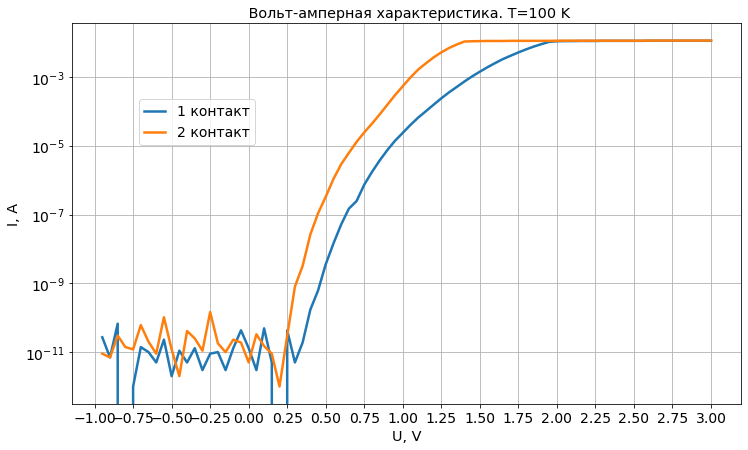

In [348]:
VAC_plot(VAC_1['Bias, V'],VAC_1['Current_100K'], VAC_2['Bias, V'],VAC_2['Current_100K'],-1, 100)

<function poly at 0x0E9CF5C8>
I_0 =  1.66e-15
R =  26.7
phi_b =  -1.27
I_0 =  4.78e-12
R =  22.28
phi_b =  -1.17


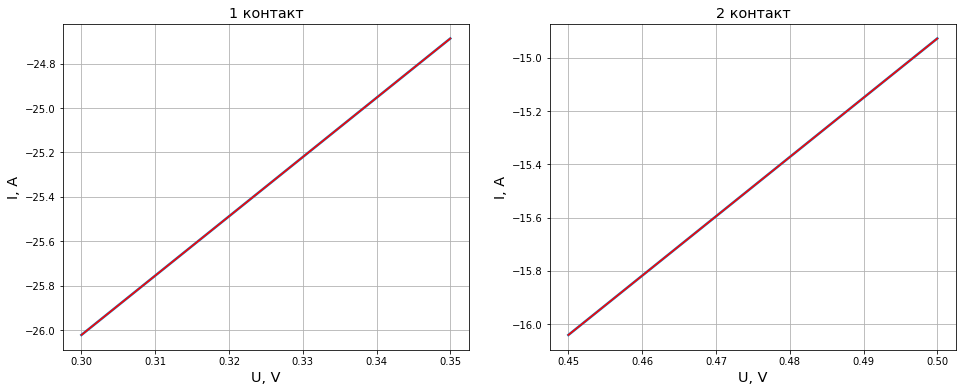

In [349]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_100K'], VAC_2['Bias, V'],VAC_2['Current_100K'], 0.25, 0.4, 0.4, 0.55, 100)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_100K'], 0.25, 0.4))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_100K'], 0.4, 0.55))


phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_100K'], 0.25, 0.4))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_100K'], 0.4, 0.55))



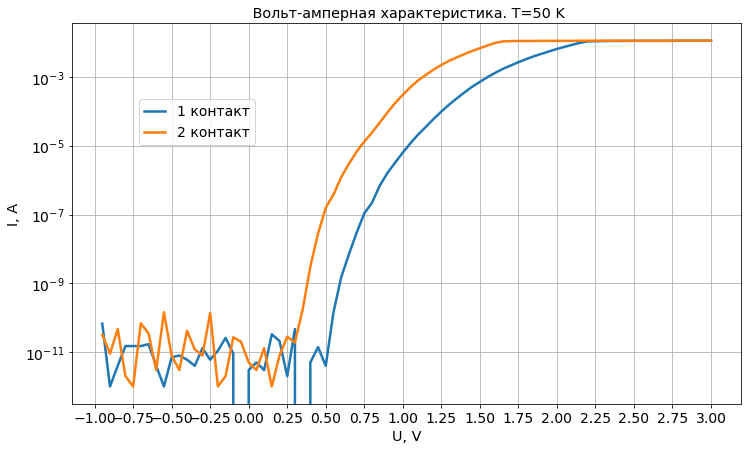

In [350]:
VAC_plot(VAC_1['Bias, V'],VAC_1['Current_50K'], VAC_2['Bias, V'],VAC_2['Current_50K'],-1, 50)

<function poly at 0x0E9CF5C8>
I_0 =  1.24e-16
R =  27.48
phi_b =  -1.33
I_0 =  2.00e-11
R =  18.09
phi_b =  -1.36


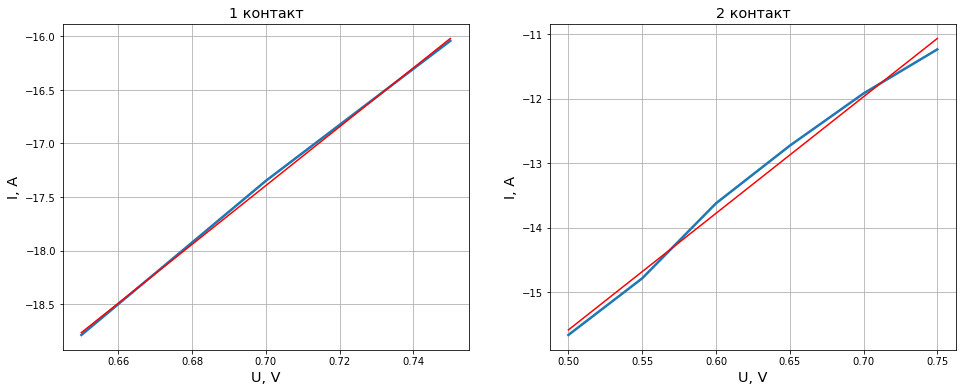

In [379]:
voltamp_comp(VAC_1['Bias, V'],VAC_1['Current_50K'], VAC_2['Bias, V'],VAC_2['Current_50K'], 0.6, 0.8, 0.45, 0.8, 50)

I_01.append(current(VAC_1['Bias, V'], VAC_1['Current_50K'], 0.6, 0.8))
I_02.append(current(VAC_2['Bias, V'], VAC_2['Current_50K'], 0.27, 0.5))


phi1.append(phi_b(VAC_1['Bias, V'], VAC_1['Current_50K'], 0.6, 0.8))
phi2.append(phi_b(VAC_2['Bias, V'], VAC_2['Current_50K'], 0.27, 0.5))



In [352]:
current(VAC_1['Bias, V'],VAC_1['Current_50K'], 0.6, 0.8)

1.2390265328804502e-16

In [353]:
I_01

[2.703357085700469e-09,
 1.4143827358097083e-10,
 2.5748520630771297e-11,
 2.0665567383048736e-12,
 1.6606129663083878e-15,
 1.2390265328804502e-16]

In [354]:
I_02

[2.301077745252763e-08,
 5.901305800547561e-10,
 4.924750147166178e-11,
 9.59668542930279e-11,
 4.7805126673506914e-12,
 6.222638870646271e-18]

In [355]:
def div_I(x):
    divv = []
    for i in range(0,5):
        divv.append(x[i+1]/x[i])
    print(divv)

In [356]:
div_I(I_01)

[0.052319493539760266, 0.18204775821185867, 0.08025924160610581, 0.000803565145600857, 0.07461260137182103]


In [357]:
div_I(I_02)

[0.02564583405633402, 0.08345187173166367, 1.9486644281486967, 0.049814206192001866, 1.3016676878914725e-06]


$\rho = \frac{1}{q \mu_n n}$ 

$\mu \approx m^{*-3/2} T^{1/2} $

$m^* = 0.2m_0$

$N_c = (\frac{2 \pi m^* k T} {h^2})^{3/2}$

$E_c - E_F = kT ln \frac {N_c}{N_d}$

In [358]:
N_c = []

for i in range (300, 0, -50):
    N_c.append((2 * np.sqrt(2*constants.pi*0.2*constants.m_e*constants.k*i/((constants.h*100)**2))**3).round(-15))
    
print('N_c =', N_c)

N_c = [2.244e+18, 1.707e+18, 1.222e+18, 7.94e+17, 4.32e+17, 1.53e+17]


In [359]:
print(constants.k)
print(constants.h)
print(constants.m_e)


1.380649e-23
6.62607015e-34
9.1093837015e-31


In [362]:
def Nd(data):
    coefficients = np.polyfit(data['Bias'], y=data['1_over_C2_100k'], deg=1)
    polynom = np.poly1d(coefficients)                                                                                        
    return  abs(2/(constants.e*constants.epsilon_0*S**2*eps*1e-2)/polynom[1])

In [363]:
N_d2 = []
for data in [data2_300K, data2_250K, data2_200K, data2_150K, data2_100K, data2_50K]:
    N_d2.append(Nd(data).round(-14))
print('N_d2 =', N_d2)

N_d2 = [4.68e+16, 4.36e+16, 4.12e+16, 4.05e+16, 7.54e+16, 3.86e+16]


In [364]:
T2 = [300, 250, 200, 150, 100, 50 ]

In [380]:
E2 = []
for i in range (0,6):
    E2.append((constants.k * T2[i] * np.log(N_c[i]/N_d2[i])/constants.e).round(2))
print('E2 =',E2)

E2 = [0.1, 0.08, 0.06, 0.04, 0.02, 0.01]


In [366]:
N_d1 = []
for data in [data1_300K, data1_150K, data1_50K]:
    N_d1.append(Nd(data).round(-14))
    
print('N_d1 =',N_d1)

N_d1 = [7.61e+16, 6.12e+16, 5.89e+16]


In [367]:
T1 = [300, 150,50]

In [368]:
E1 = []
N_c1 = []

for i in range (0,3):
    N_c1.append((2 * np.sqrt(2*constants.pi*0.2*constants.m_e*constants.k*T[i]/((constants.h*100)**2))**3).round(-16))
    E1.append((constants.k * T1[i] * np.log(N_c1[i]/N_d1[i])/constants.e).round(2))
print('N_c1 =',N_c1)
print('E1 =', E1)

N_c1 = [2.24e+18, 1.71e+18, 1.22e+18]
E1 = [0.09, 0.04, 0.01]


In [369]:
print('phi_b1 = ', phi1)
print('phi_b2 = ', phi2)

phi_b1 =  [-1.19, -1.23, -1.18, -1.3, -1.27, -1.33]
phi_b2 =  [-1.1, -0.94, -0.93, -1.18, -1.17, -0.8]


In [370]:
print('Vd1 = ', V_d1)
print('Vd2 = ', V_d2)

Vd1 =  [-1.26, -0.64, -0.52]
Vd2 =  [0.76, 0.61, -0.6, -0.54, -0.53, -0.49]


In [ ]:
# min_peak2 = [data_sula_c['channel_{}'
#                        .format(i)][find_peaks(-data_sula_c['channel_{}'.format(i)], width=15, distance=45)[0][1]] for i in range(1, 5)]

# T_peak2 = [data_sula_c.loc[(data_sula_c['channel_{}'.format(i)] == min_peak2[i-1]) & (data_sula_c['T']>190)]['T'].mean() for i in range(1, 5)]

In [ ]:
# fig = px.line(data2_200K, x = 'Bias', y = '1_over_C2_100k')
# fig.update_yaxes(title_text = 'current, A')
# fig.update_xaxes(title_text = 'Voltage, V')
# fig.update_layout(hoverlabel=dict(bgcolor="white"))
# fig.update_traces(hovertemplate  = 'Voltage: %{x}V <br>Current: %{y}A')
# fig.show()